# Telco Data

### Mission

* Discover drivers of customer churn in Telco DataSet.

* Use drivers to develop a machine learning model to predict customer churn.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

import wrangle_telco as w
import explore_telco as e
import model_telco as m

import warnings
warnings.filterwarnings("ignore")


### Acquire Data

* Data acquired from CodeUp database

* Data set contained 7043 rows and 24 columns before cleaning
* Each row represents an individual customer
* Each column represents a feature of that particular customer

### Prepare Data

#### Actions:

* Removed columns that did not contain useful information
* Renamed columns to promote readability
* Checked for nulls in the data (there were none)
* Converted current datatype to appropriate datatype
* Removed white space from values in object columns
* Encoded categorical variables
* Split data into train, validate and test (approx. 60/25/15), stratifying on 'churn'
* Outliers have not been removed for this iteration of the project

## Data Dictionary
#### Churn is defined as a customer that has cancelled their services.

In [2]:
# acquiring the data
telco_df = w.get_telco_data()
# preparing and splitting the data into train, validate, and test
train, validate, test, customer_id = w.prep_telco_data(telco_df)

## A brief look at the data

In [3]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,1,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,1,0,0,1,0,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,1,0,0,0,0,1,0,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,1,0,0,0,0,1,0,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,1,0,1,0,0,0,0,0,1


## Data Summary

In [4]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,...,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,32.775210,64.805131,2316.775641,0.498095,0.485141,0.302769,0.905258,0.590297,0.265685,...,0.549911,0.207010,0.243078,0.342393,0.437389,0.220218,0.218948,0.227330,0.327407,0.226314
std,0.367845,24.709604,30.294804,2284.984394,0.500060,0.499843,0.459514,0.292896,0.491841,0.441753,...,0.497566,0.405215,0.428997,0.474570,0.496127,0.414447,0.413586,0.419161,0.469327,0.418498
min,0.000000,1.000000,18.250000,18.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,34.700000,396.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,30.000000,70.250000,1414.800000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,90.300000,3893.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.650000,8594.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Explore Data

## How often does a customer churn?

In [5]:
# value counts normalized of customer churn
telco_df.churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: churn, dtype: float64

* Telco has 26% customer churn rate.

## Is the customers contract type an indicator of customer churn?

Text(0.5, 1.0, 'Customer churn based on Contract Type')

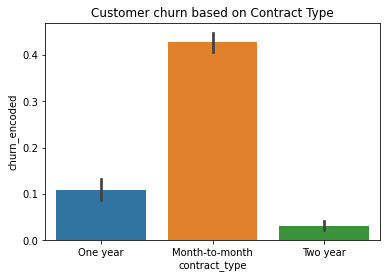

In [6]:
### viz showing churn by contract type
sns.barplot(data = train, y = 'churn_encoded', x = 'contract_type')
plt.title('Customer churn based on Contract Type')

**I will now use a chi-square test to investigate whether 'churn' and "contract type" are related** 

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

* $H_0$: There is **no** association between churn and contract type.
* $H_a$: There **is** an association between churn and contract type.

In [7]:
# get chi-square test results
e.get_chi_contract_type(train)

We reject the null hypothesis
chi^2 = 664.6572
p     = 0.0000


### Results
**The p-value is greater than the alpha. Therefore, there is evidence to support that "churn" and "contract type" are related. Based on the results observed in the train data, I believe that using the "contract type" feature in modeling will likely have a positive impact on the model's accuracy when predicting customer churn.**

## Is the customers internet service type an indicator of customer churn?

Text(0.5, 1.0, 'Customer churn based on Internet Service Type')

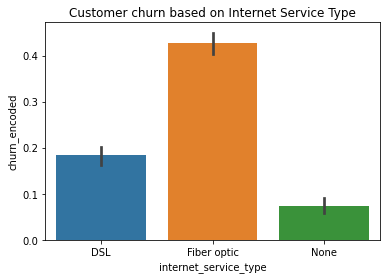

In [8]:
### viz showing churn by internet service type
sns.barplot(data = train, y = 'churn_encoded', x = 'internet_service_type')
plt.title('Customer churn based on Internet Service Type')

**I will now use a chi-square test to investigate whether 'churn' and "internet service type" are related** 

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

* $H_0$: There is **no** association between churn and internet service type.
* $H_a$: There **is** an association between churn and internet service type.

In [9]:
# get chi-square test results
e.get_chi_internet_type(train)

We reject the null hypothesis
chi^2 = 439.7661
p     = 0.0000


### Results
**The p-value is greater than the alpha. Therefore, there is evidence to support that "churn" and "internet service type" are related. Based on the results observed in the train data, I believe that using the "internet service type" feature in modeling will likely have a positive impact on the model's accuracy when predicting customer churn.**

## Is the customers gender an indicator of customer churn?

Text(0.5, 1.0, 'Customer churn based on Gender')

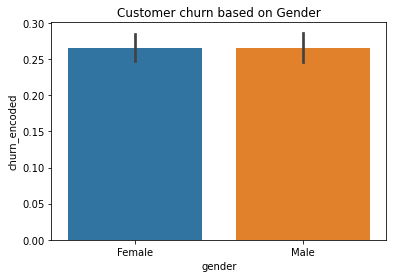

In [10]:
### viz showing churn by gender
sns.barplot(data = train, y = 'churn_encoded', x = 'gender')
plt.title('Customer churn based on Gender')

**I will now use a chi-square test to investigate whether 'churn' and "gender" are related** 

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

* $H_0$: There is **no** association between churn and gender.
* $H_a$: There **is** an association between churn and gender.

In [11]:
# get chi-square test results
e.get_chi_gender(train)

We fail to reject the null hypothesis
chi^2 = 0.0000
p     = 1.0000


* The customer churn data is very similar for men versus women

**Because the results of customer churn instances are very similar between the genders, it is not likely that "gender" will be a useful feature to model on.**

## Is phone service an indicator of customer churn?

Text(0.5, 1.0, 'Customer churn based on Phone Service')

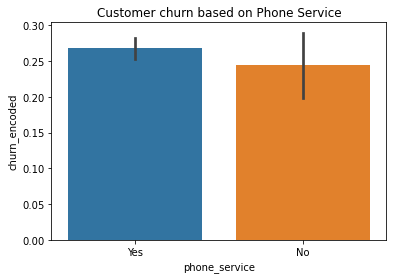

In [12]:
### viz showing churn by phone service
sns.barplot(data = train, y = 'churn_encoded', x = 'phone_service')
plt.title('Customer churn based on Phone Service')

**I will now use a chi-square test to investigate whether 'churn' and "phone service" are related** 

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

* $H_0$: There is **no** association between churn and phone service.
* $H_a$: There **is** an association between churn and phone service.

In [13]:
# get chi-square test results
e.get_chi_phone(train)

We fail to reject the null hypothesis
chi^2 = 0.8769
p     = 0.3491


**The results show the p-value is less than the alpha, therefore it is not likely that "phone service" will be a useful feature to model on.**

## Exploration Summary

* "contract type" and "internet service type" were each found to be drivers of "churn"
    
    * "month-to-month contract type" was found to be a driver of "churn"
    * "fiber optic internet type" was found to be a driver of "churn" 


* "gender" was not found to be a driver of "churn"
* "phone service" was not found to be a driver of "churn"


## Creating predictive models

### Features included: 

* "contract type" - There is a significant difference in month-to-month customer churn observed versus customers with 1 or 2 years contracts

### Features not included:

* "internet service type" - Even though there is a significant difference in fiber optic customer churn observed versus customers with DSL or no internet the focus will not remain on this feature.

* "Gender" - There is no evidence that "Gender" is a driver of customer churn
* "Phone Service" - There is no evidence that "Phone Service" is a driver of customer churn

## Modeling  



### Predicting Zero customer churn for every customer produces accuracy of 73%

* 73% will be the baseline accuracy I use for this project
* Four different model types will be evaluated using various hyperparameter configurations
* Models will be evaluated on train and validate data
* Evaluation of model will be based on accuracy metric
* The model that performs the best will then be evaluated on test data 

In [14]:
# gets data prepared for modeling sets
x_train, y_train, x_validate, y_validate, x_test, y_test = m.model_sets(train,validate,test)

In [15]:
x_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,multiple_lines_No phone service,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,0,58,71.10,4299.20,1,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
1915,0,71,85.45,6028.95,0,0,1,1,1,0,...,0,1,0,0,1,0,0,1,0,0
5054,0,35,25.75,882.55,1,1,1,1,1,0,...,1,0,0,0,0,1,0,0,1,0
2355,0,1,19.20,19.20,0,1,1,1,0,0,...,1,0,0,0,0,1,0,0,0,1
6279,1,20,54.00,1055.90,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


## Decision Tree

In [16]:
# get decision tree results
m.get_tree(x_train, y_train, x_validate, y_validate, x_test, y_test)

Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on validate set: 0.77


## Random Forest

In [17]:
# get random forest results
m.get_forest(x_train, y_train, x_validate, y_validate, x_test, y_test)

Accuracy of Random Forest classifier on training set: 0.81
Accuracy of Random Forest classifier on validate set: 0.79


## KNN Model

In [18]:
# get KNN results
m.get_knn(x_train, y_train, x_validate, y_validate, x_test, y_test)

Accuracy of KNN classifier on training set: 0.83
Accuracy of KNN classifier on validate set: 0.76


## Logistic Regression

In [19]:
# get logistic regression results
m.get_reg(x_train, y_train, x_validate, y_validate, x_test, y_test)

Accuracy of Logistic Regression classifier on training set: 0.73
Accuracy of Logistic Regression classifier on validate set: 0.73


## Modeling Summary

* The Logistic Regression model performed equal on train and validate data sets as the baseline at 73%.
    * The ideal model is expected to outperform the baseline and for that reason this model will not be moving forward to test data.
    
* Decision Tree, Random Forest, and KNN models all outperformed the baseline on train and validate data sets.
    * The ideal model is expected to have the least amount of variance for Accuracy between the train and validate data.
 
* The Random Forest model had the least difference between the training and validation data of only 2 percentage points and the highest validate score in comparison to the other models.
    * The Random Forest model is the ideal model to use on the test data set. 

### Proceeded with Random Forest model on Test data

In [20]:
# Random Forest on test
m.get_rf_test(x_train, y_train, x_validate, y_validate, x_test, y_test)

Accuracy of Random Forest classifier on test set: 0.81


## Conclusions

* Random Forest classifier model showed accuracy of :

        * 81% on training data samples
        * 79% on validate data samples
        * 81% on test data samples

### Key Takeaway

#### Random Forest model was able to predict with 81% Accuracy of Telco customer churn based soley on the customers contract type.

### Recommendations

   * Consider customer contract type when making projections of customer churn rate.
   * Isolate month to month customer data for more in depth analysis to prevent churn.  
   * Consider monthly service fees for customers that opt out of 1 or 2 year contracts.
   * Consider marketing strategies that target month to month customers.  